In [4]:
# sam brown
# sam_brown@mines.edu
# July 10
# Goal: Merge our energy data and our other features to try and find patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

df_gz = pd.read_csv("/Users/sambrown04/Documents/SURF/Preproc_data/averages_events_2011-13.csv")
energies = pd.read_csv("Energies_gz.csv")

In [7]:
# Make sure time columns are datetime
df_gz['start_time'] = pd.to_datetime(df_gz['start_time'])
energies['date'] = pd.to_datetime(energies['date'])

# Sort by time (required for merge_asof)
df_gz = df_gz.sort_values('start_time')
energies = energies.sort_values('date')

# Merge based on nearest timestamp within 5 hours
df_merged = pd.merge_asof(
    df_gz,
    energies,
    left_on='start_time',
    right_on='date',
    direction='nearest',
    tolerance=pd.Timedelta('5h')
)

# Drop extra column from merge
df_merged = df_merged.drop(columns=['date'])

In [9]:
df_merged['evt_energy'].isna().sum()

14

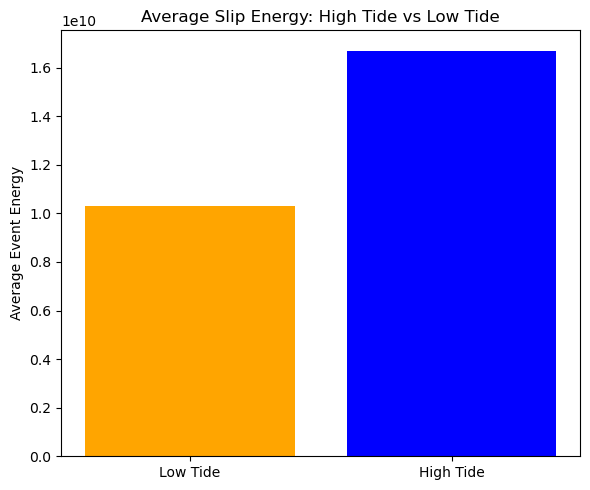

In [10]:
avg_energy = df_merged.groupby('h_event')['evt_energy'].mean()

labels = ['Low Tide', 'High Tide']
values = [avg_energy[0], avg_energy[1]]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['orange', 'blue'])

# Labels
plt.ylabel('Average Event Energy')
plt.title('Average Slip Energy: High Tide vs Low Tide')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Energy and severity for gz events 11-13')

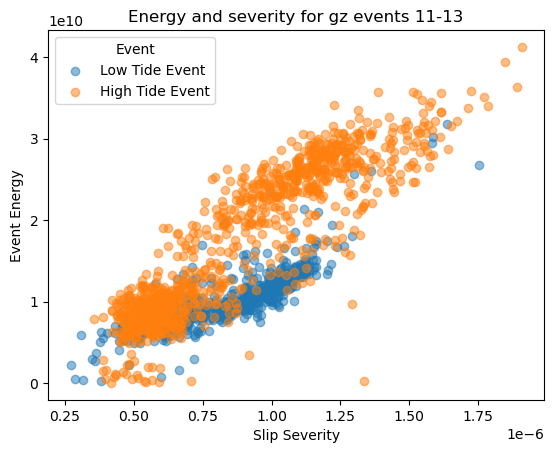

In [11]:
fig, ax = plt.subplots()

colors = {0: 'tab:blue', 1: 'tab:orange'}
labels = {0: 'Low Tide Event', 1: 'High Tide Event'}

for h_val, group in df_merged.groupby('h_event'):
    ax.scatter(group['slip_severity'],
               group['evt_energy'],
               c=colors[h_val],
               label=labels[h_val],
               alpha=0.5)


ax.legend(title='Event')
ax.set_xlabel('Slip Severity')
ax.set_ylabel('Event Energy')
ax.set_title('Energy and severity for gz events 11-13')

Text(0.5, 1.0, 'Energy and severity for gz events 11-13')

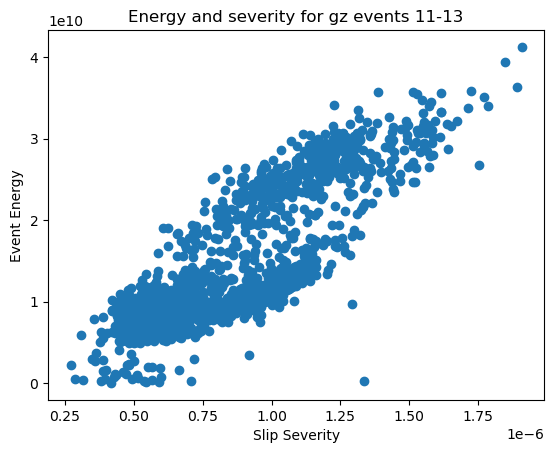

In [13]:
fig, ax = plt.subplots()

scatter = plt.scatter(df_merged['slip_severity'], df_merged['evt_energy'])

ax.set_xlabel('Slip Severity')
ax.set_ylabel('Event Energy')
ax.set_title('Energy and severity for gz events 11-13')

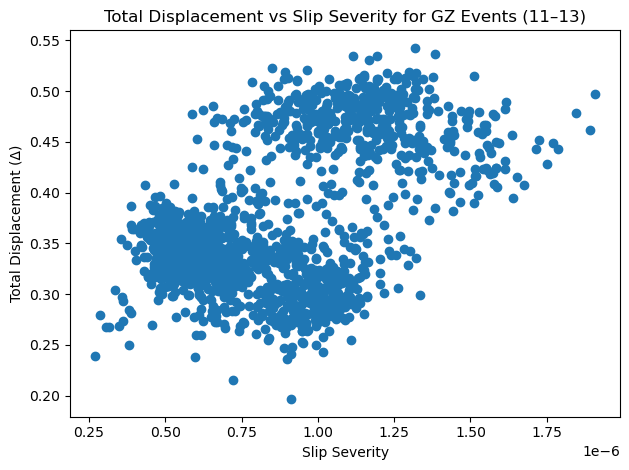

In [20]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_merged['slip_severity'], df_merged['total_delta'])

ax.set_xlabel('Slip Severity')
ax.set_ylabel('Total Displacement (Δ)')
ax.set_title('Total Displacement vs Slip Severity for GZ Events (11–13)')

plt.tight_layout()


         pre_slip_area_count  pre_slip_area_mean  pre_slip_area_min  \
cluster                                                               
0                     1119.0          115.960094          11.513834   
1                      511.0           93.820730           9.859898   

         pre_slip_area_25%  pre_slip_area_50%  pre_slip_area_75%  \
cluster                                                            
0                71.841369         108.728994         147.373784   
1                65.096544          93.409081         118.166747   

         pre_slip_area_max  pre_slip_area_std  total_delta_count  \
cluster                                                            
0              2317.496286          93.820746             1119.0   
1               287.084778          38.731029              511.0   

         total_delta_mean  ...  h_event_max  h_event_std  evt_energy_count  \
cluster                    ...                                               
0            

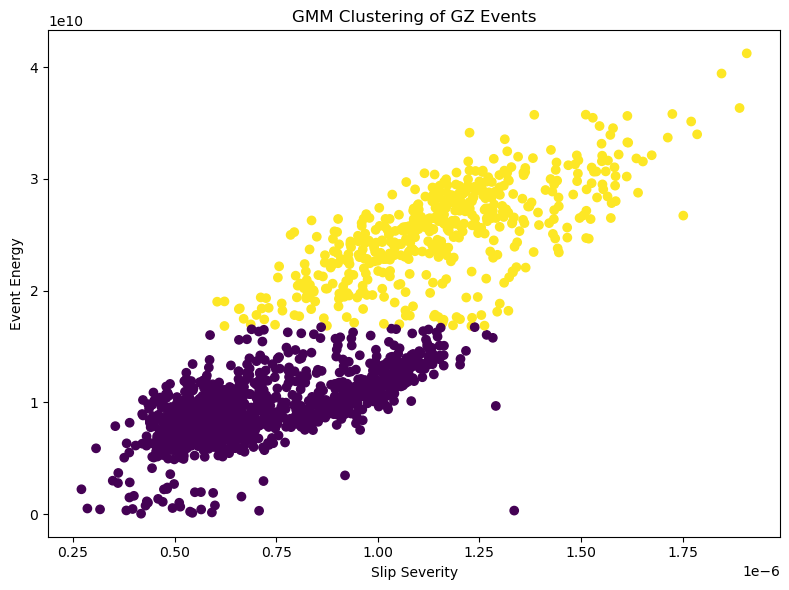

In [31]:
# Clustering
df_clustered = df_merged.dropna(subset=['slip_severity', 'evt_energy']).copy()

X = df_clustered[['slip_severity', 'evt_energy']].values

gmm = GaussianMixture(n_components = 2, covariance_type='full')
df_clustered['cluster'] = gmm.fit_predict(X)

cluster_summary = df_clustered.groupby('cluster').describe()

# flatten multi-index columns
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=df_clustered['cluster'], cmap='viridis')
plt.xlabel('Slip Severity')
plt.ylabel('Event Energy')
plt.title('GMM Clustering of GZ Events')
plt.tight_layout()
plt.show()



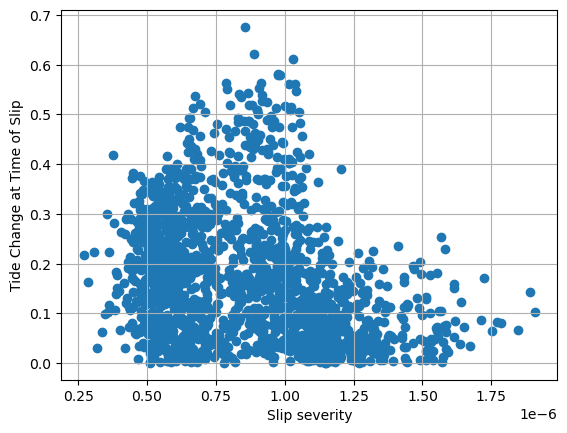

In [24]:
fig, ax  = plt.subplots()

ax.scatter(df_merged['slip_severity'], abs(df_merged['tide_change']))
ax.set_ylabel('Tide Change at Time of Slip')
ax.set_xlabel('Slip severity')
ax.grid()


Takeaways:
Pre-Cursor Slip is about 20% smaller in Cluster 1(Yellow) than Cluster 0.
Cluster 1 occurs under more stable tides (mean tide derivative of -0.045 vs -.177)

In [57]:
energies_mg = pd.read_csv("Energies_mg.csv")

In [59]:
energies_mg.sort_values('date')

,date,evt_energy
201,2014-01-24 08:10:00,4.678990e+08
460,2014-01-24 18:35:45,2.361477e+08
457,2014-01-25 09:15:00,3.939662e+08
141,2014-01-25 22:00:00,6.853619e+08
210,2014-01-26 11:40:00,2.909151e+08
...,...,...
421,2014-12-19 12:40:00,5.197979e+08
4,2014-12-20 12:55:45,6.052637e+08
187,2014-12-21 13:25:00,7.561304e+07
122,2014-12-22 13:45:00,4.788860e+08


In [61]:
full_dat = pd.read_csv("/Users/sambrown04/Documents/SURF/Preproc_data/10-18.csv")

In [65]:
full_dat['start_time'] = pd.to_datetime(full_dat['start_time'])
energies_mg['date'] = pd.to_datetime(energies_mg['date'])

full_dat = full_dat.sort_values('start_time')
energies_mg = energies_mg.sort_values('date')

merged = pd.merge_asof(
    full_dat,
    energies_mg,
    left_on='start_time',
    right_on='date',
    direction='nearest',
    tolerance=pd.Timedelta('5h')
)

# Drop extra column from merge
merged = merged.drop(columns=['date'])

In [67]:
filt = merged[merged['evt_energy'].notna()]

(0.0, 1000000000.0)

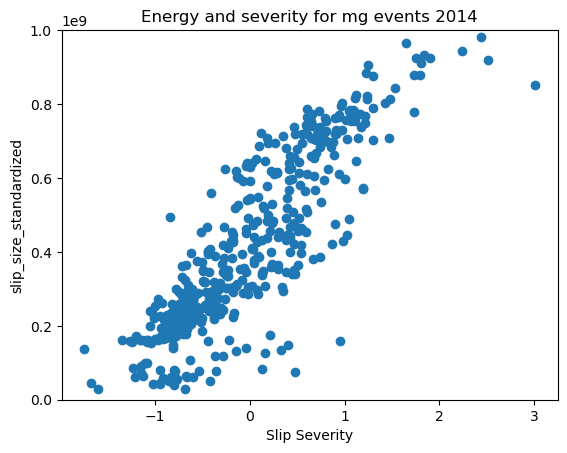

In [69]:
fig, ax = plt.subplots()

scatter = plt.scatter(filt['sev_stds'], filt['evt_energy'])

ax.set_xlabel('Slip Severity')
ax.set_ylabel('slip_size_standardized')
ax.set_title('Energy and severity for mg events 2014')
ax.set_ylim([0,1*10**9])